# Project Group 14: Dataset preparation

In [72]:
# Import our dependencies
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import sqlalchemy
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder



# Import our input dataset
heart_disease_df = pd.read_csv('framingham.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [73]:
# Define the columns
heart_disease_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [74]:
#Describe the column
heart_disease_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [75]:
# Find null values
for column in heart_disease_df.columns:
    print(f"Column {column} has {tele_df[column].isnull().sum()}null values")

Column male has 0null values
Column age has 0null values
Column education has 105null values
Column currentSmoker has 0null values
Column cigsPerDay has 29null values
Column BPMeds has 53null values
Column prevalentStroke has 0null values
Column prevalentHyp has 0null values
Column diabetes has 0null values
Column totChol has 50null values
Column sysBP has 0null values
Column diaBP has 0null values
Column BMI has 19null values
Column heartRate has 1null values
Column glucose has 388null values
Column TenYearCHD has 0null values


In [76]:
# Drop null rows
heart_disease_df = heart_disease_df.dropna()

In [77]:
# Find duplicate entries
print(f"Duplicate entries: {heart_disease_df.duplicated().sum()}")

Duplicate entries: 0


In [78]:
# Remove the education column
heart_disease_df.drop(columns=["education"], inplace=True)
heart_disease_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [79]:
# Describe the dataframe
heart_disease_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [80]:
# Rename the columns of male: gender where 1 = male and 0 = female
updated_heart_disease_df = heart_disease_df.rename(columns = {'male': 'gender'}, inplace = False)
updated_heart_disease_df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [81]:
# Saving cleaned data to a new data frame
file_path = "cardiac_heart_disease.csv"
updated_heart_disease_df.to_csv(file_path, index=False)

 # Logistic Regression

 Logistic Regression is a statistical method for predicting binary outcomes from data.

 Examples of this are "yes" vs "no" or "high credit risk" vs "low credit risk".

 These are categories that translate to probability of being a 0 or a 1

In [96]:
# Checking Heart Disease Rates by age and gender

class_0 = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 0]["age"]
class_1 = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 1]["age"]

hist_data = [class_0, class_1]
group_labels = ['Female', 'Male']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Heart Disease Rate Age and Gender Density Plot', xaxis=dict(title='Age [s]'))
iplot(fig, filename='dist_only')


<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

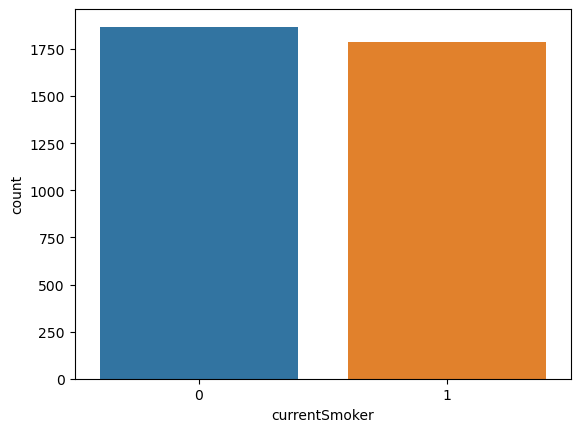

In [97]:
# Classification Category
sns.countplot(x='currentSmoker', data=updated_heart_disease_df)


<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

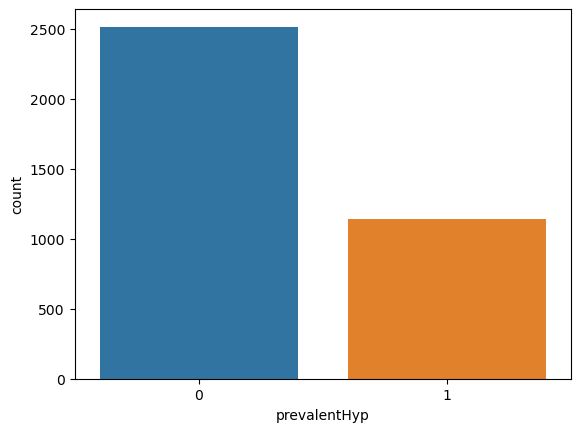

In [98]:
sns.countplot(x='prevalentHyp', data=updated_heart_disease_df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

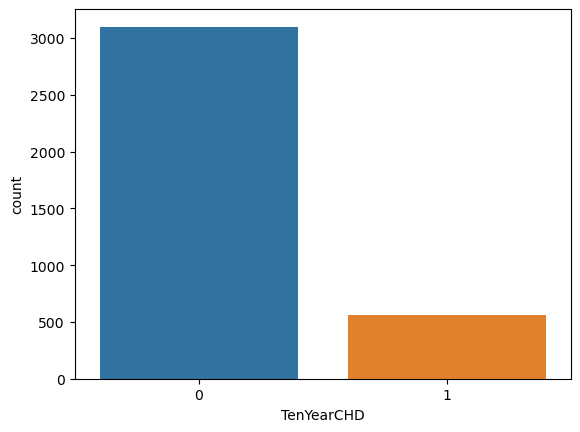

In [99]:
sns.countplot(x='TenYearCHD', data=updated_heart_disease_df)

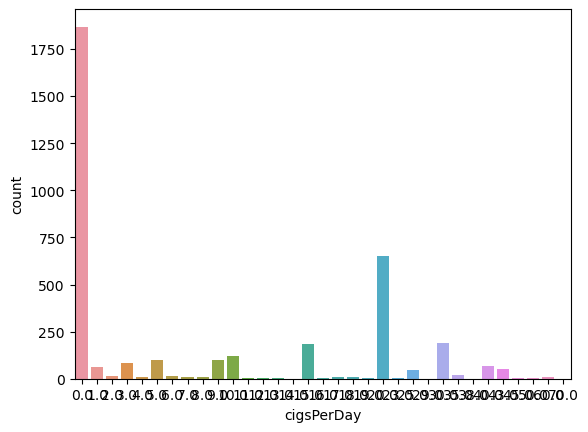

In [106]:
sns.countplot(x='cigsPerDay', data=updated_heart_disease_df)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

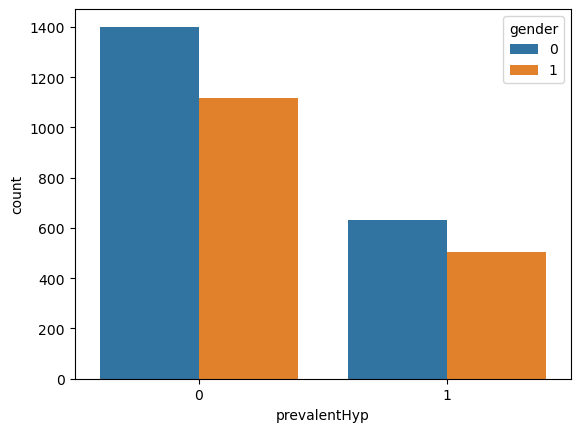

In [101]:
# Prevalent Hypertension between Genders
sns.countplot(x='prevalentHyp', hue='gender', data=updated_heart_disease_df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

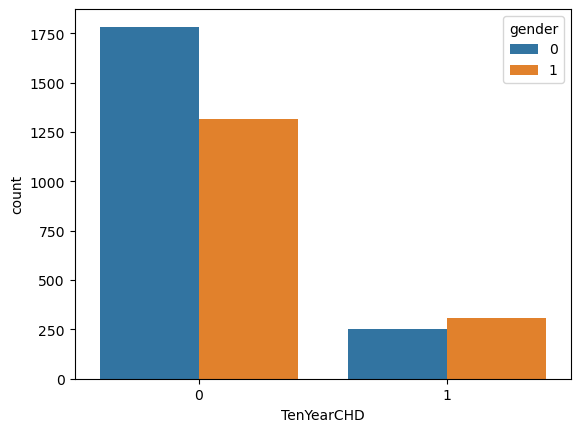

In [102]:
# Ten Year Chronic Heart Disease between Genders
sns.countplot(x='TenYearCHD', hue='gender', data=updated_heart_disease_df)

In [103]:
# Let's plot the blood sugar levels(glucose) against age. 
# The age is shown in years from the start of the time period of the given dataset.

blood_sugar_levels = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 1]

trace = go.Scatter(
    x = blood_sugar_levels['age'],y = blood_sugar_levels['glucose'],
    name="glucose",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= blood_sugar_levels['glucose'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Glucose intake per year',
          xaxis = dict(title = 'Age [s]', showticklabels=True), 
          yaxis = dict(title = 'glucose'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='blood_sugar_levels-glucose')